# xAPI-SG Processor

### Processor of traces following the Experience API for Serious Games Profile (xAPI-SG)

**xAPI-SG main reference:**  
*Applying standards to systematize learning analytics in serious games.
Ángel Serrano-Laguna, Iván Martínez-Ortiz, Jason Haag, Damon Regan, Andy Johnson, Baltasar Fernández-Manjón 
Computer Standards & Interfaces 50 (2017) 116–123, http://dx.doi.org/10.1016/j.csi.2016.09.014*

Further info on GitHub wiki page: https://github.com/e-ucm/rage-analytics/wiki/xAPI-SG-Profile 

The following code:
- expects as input a JSON file with a list of xAPI-SG statements
- analyzes the xAPI-SG statements and fills an adaptation of the default ser of visualizations
https://github.com/e-ucm/rage-analytics/wiki/Default-visualizations-teacher 

In [1]:
import json
import numpy as np
from datetime import datetime
import copy
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from collections import Counter

In [1]:
%run ProcessxAPISGStatement.ipynb # notebook to process an xAPI-SG statement

In [2]:
# file with xAPI-SG statements      
location="" # file location
file_name="" # file name



players_info = {} # dict with players info
start_time = datetime.now() 

## FILE MUST CONTAIN LIST OF XAPI-SG PROFILE TRACES
## (traces separated by commas and enclosed by []) 
with open(location+file_name+".json", 'r', encoding='UTF-8') as f:
    statements_dict = json.load(f, encoding='UTF-8')
    for s in statements_dict:
        process_xapisg_statement(s, players_info)
    
end_time = datetime.now()

import pprint
pprint.pprint(players_info)

NameError: name 'datetime' is not defined

**Pie chart with number of games started and completed**

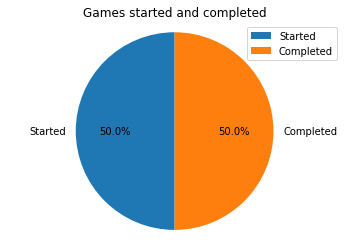

In [4]:
%run vis/xAPISG-GamesStartedCompleted.ipynb
vis_games_started_completed(players_info)

**Bar chart with number of times each video was seen and skipped**

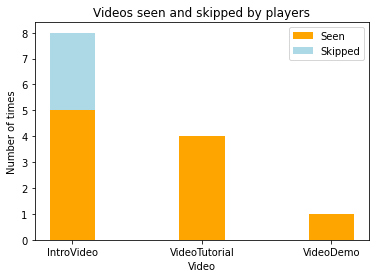

In [5]:
%run vis/xAPISG-VideosSeenSkipped.ipynb
vis_videos_seen_skipped(players_info)

**Line chart with progress of players per time**

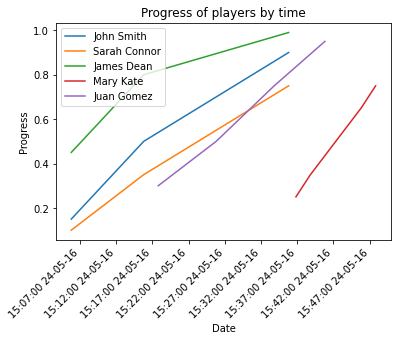

In [6]:
%run vis/xAPISG-PlayersProgress.ipynb
vis_players_progress(players_info)

**Bar chart with scores of players in each completable**

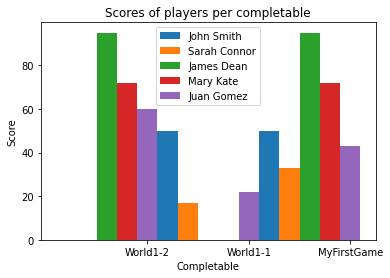

In [7]:
%run vis/xAPISG-CompletablesScores.ipynb
vis_completables_scores(players_info)

**Bar chart with progress of players in each completable**

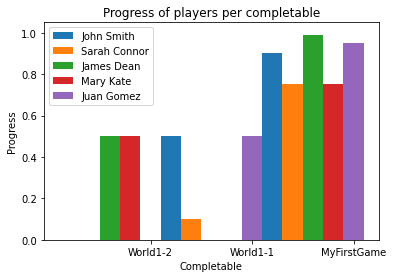

In [8]:
%run vis/xAPISG-CompletablesProgress.ipynb
vis_completables_progress(players_info)

**Bar chart with max and min completion time in each completable**

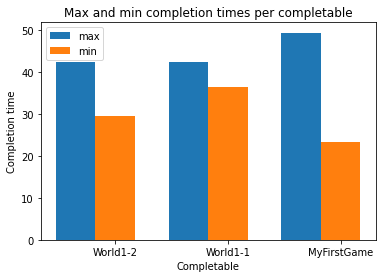

In [9]:
%run vis/xAPISG-CompletablesTimes.ipynb
vis_completables_times(players_info)

**Bar chart with number of correct and incorrect answers per player**

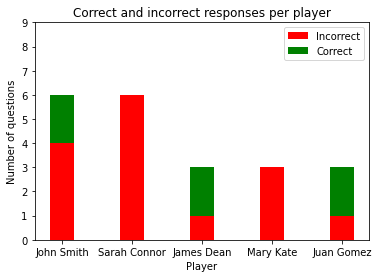

In [10]:
%run vis/xAPISG-CorrectIncorrectPlayer.ipynb
vis_correct_incorrect_player(players_info)

**Bar chart with number of correct and incorrect answers per question (alternative)**

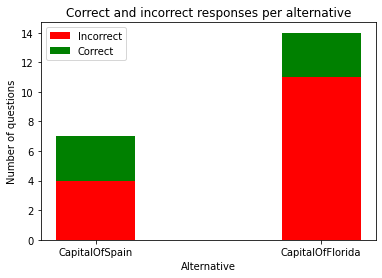

In [11]:
%run vis/xAPISG-CorrectIncorrectQuestion.ipynb
vis_correct_incorrect_question(players_info)

**Bar chart per question, with number of times each alternative has been selected**

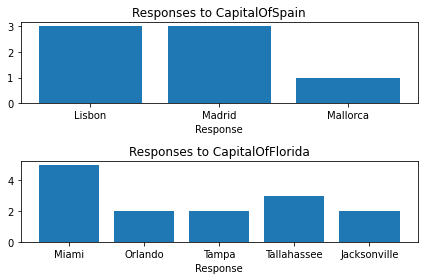

In [12]:
%run vis/xAPISG-AlternativesSelectedQuestion.ipynb
vis_alternatives_selected_question(players_info)

**Bar player, with number of times each item has been interacted by**

In [ ]:
%run vis/xAPISG-ItemsInteracted.ipynb
vis_items_interacted_times(players_info)

**Bar player, with number of times each accessible has been accesseded by**

In [ ]:
%run vis/xAPISG-AccessedAccesible.ipynb
vis_accessibles_times(players_info)

**Bar player, with number of times each interacted item with specific action_type has been interacted by the player**


In [ ]:
%run vis/xAPISG-ItemsActionTypeInteracted.ipynb
vis_items_action_type_interacted_times(players_info)